In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [30]:
df=pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


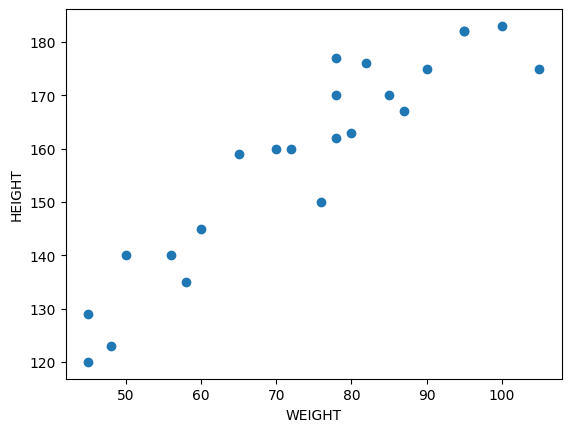

In [31]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("WEIGHT")
plt.ylabel("HEIGHT")
plt.show()


In [32]:
#divide the dataaset in dependend and dependent features
X=df[['Weight']] #independent
Y=df[['Height']] #dependent

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42 )
# mtlb 20 % mera hoga test data
#if i put random state=42 it will be random and not taken in any order

In [35]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler=StandardScaler()



In [38]:
X_train.head() # yhn first column is z-score

,Weight
12,105
1,58
13,100
5,78
2,48


In [39]:
X_train=scaler.fit_transform(X_train)


In [40]:
X_test=scaler.transform(X_test)

# to prevent data leakage yani jb ham se kre mean toh transform se z-scare nikale to mena or std dvn treain ka use hoga 
# hence data uske hisab se standardize ho rkha hoga

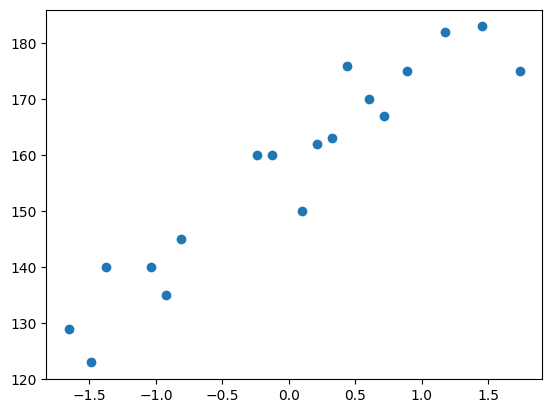

In [41]:
plt.scatter(X_train,Y_train)


In [42]:
#train simple linear regression model
from sklearn.linear_model import LinearRegression


In [43]:
regressor=LinearRegression()


In [44]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [45]:
print("SLOPE OF COEFF OF WEIGHT : ",regressor.coef_)
print("THE INTERCEPT IS : ",regressor.intercept_)

SLOPE OF COEFF OF WEIGHT :  [[17.03440872]]
THE INTERCEPT IS :  [157.5]


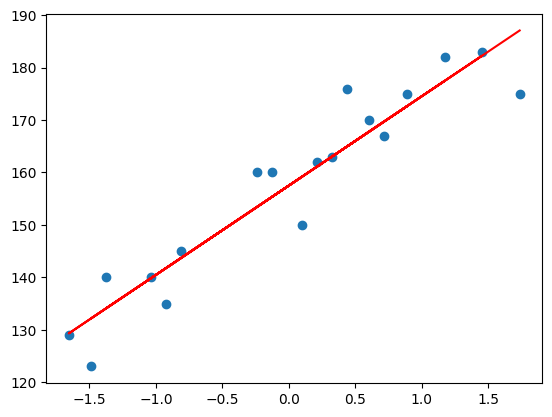

In [46]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

## DOING THE PREDICTION FOR THE TEST DATA
1.  PREDICTED_TEST_DATA=intercept+coef_(weight)


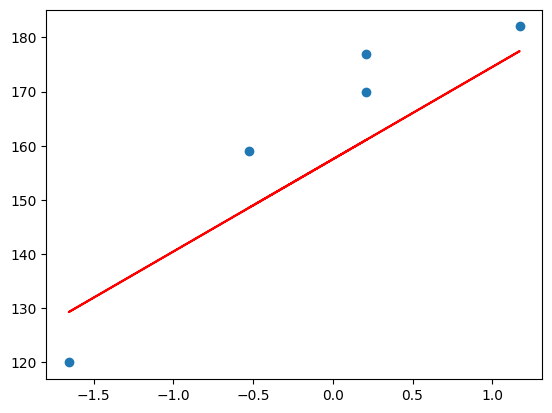

In [47]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,regressor.predict(X_test),'r')


## PERFORMANCE METRICS


In [48]:
from sklearn.metrics import mean_squared_error,mean_absolute_error



In [49]:
y_pred=regressor.predict(X_test)


In [50]:
mse=mean_squared_error(Y_test,y_pred)


In [51]:
mse

109.77592599051664

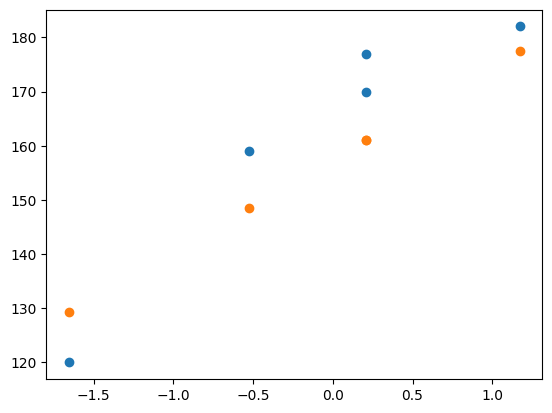

In [52]:
plt.scatter(X_test,Y_test)
plt.scatter(X_test,y_pred)

In [53]:
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)

In [54]:
mse,mae,rmse


(109.77592599051664, 9.822657814519232, np.float64(10.477400726827081))

In [57]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,y_pred)


In [58]:
score

0.776986986042344